In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

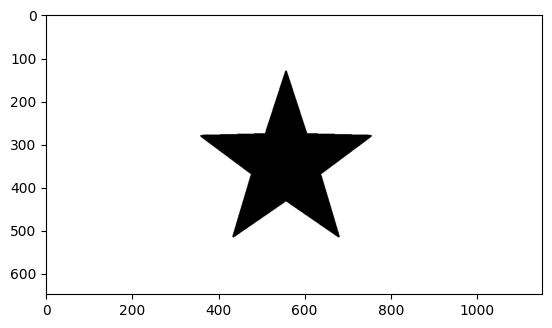

In [9]:
image = cv2.imread('E:/python/Images for opencv/star.png')
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [10]:
grey = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
ret , thresh1 = cv2.threshold(grey , 127 , 255 , 0)
contours , hierarchy = cv2.findContours(thresh1 , cv2.RETR_CCOMP , cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours , key = cv2.contourArea , reverse = False)
n = str(len(contours))
print(n)
# cv2.imshow("Test image",image)
# cv2.imshow("grey image",grey)
# cv2.imshow("Threshold image",thresh1)
# cv2.waitKey()
# cv2.destroyAllWindows()

2


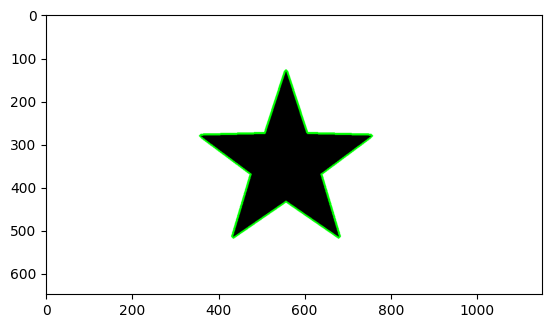

In [11]:
star_contour = sorted_contours[0]  # contour 2 is rectangle box of image
cv2.drawContours(image , [star_contour] , -1 , (0 , 255 , 0) , 3)
plt.imshow(image)

In [12]:
test = cv2.imread('E:/python/Images for opencv/output2.png')
output = test.copy()
greytest = cv2.cvtColor(test , cv2.COLOR_BGR2GRAY)
ret , thresh2 = cv2.threshold(greytest , 127 , 255 , 0)         # Change threshold based on your need
contours2 , hierarchy = cv2.findContours(thresh2 , cv2.RETR_CCOMP , cv2.CHAIN_APPROX_SIMPLE)
print(str(len(contours2)))
cv2.imshow("Test image",test)
cv2.imshow("grey image",greytest)
cv2.imshow("Threshold image",thresh2)
cv2.waitKey()
cv2.destroyAllWindows()

3


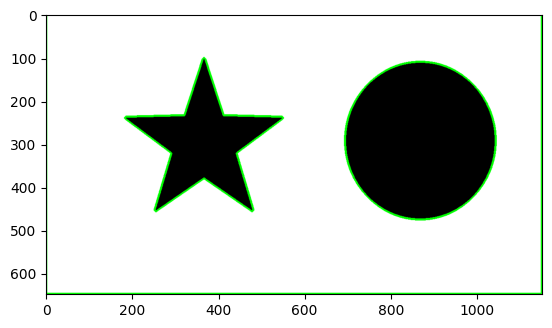

In [13]:
cv2.drawContours(test , contours2 , -1 , (0 , 255 , 0) , 3)
plt.imshow(test)

0.5842144865585525
0.17929723454625968
0.0015869138101060535


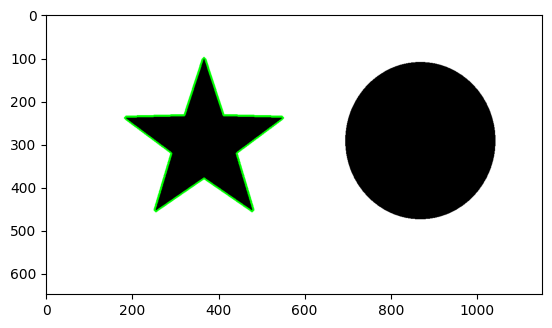

In [14]:
best_match = float('inf')
for c in contours2:
    match = cv2.matchShapes(star_contour, c, 3, 0.0)
    print (match)
    if match < 10.0 and match < best_match:
        closest_contour = c
        best_match = match
    else :
        closest_contour = None
cv2.drawContours(output , [closest_contour] , -1 , (0 , 255 , 0) , 3)
plt.imshow(output)
plt.show()